In [19]:
#importing necessary libraries

import numpy as np
import matplotlib.pyplot as plt
from peakBasedFunctions import voigtMultiPeakRanges
from peakBasedFunctions import voigtNUniPeak
from stackingFunctions import widthNormLinStacker

[[ 309.17501 -175.34567]
 [ 309.1765  -114.03089]
 [ 309.178   -101.50752]
 ...
 [ 315.83501    7.65716]
 [ 315.8365     1.86059]
 [ 315.838     11.45499]]


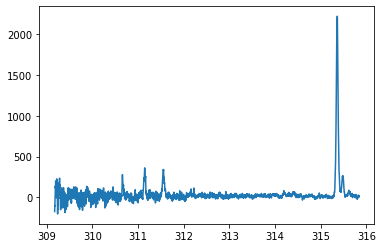

In [33]:
data2metNM = np.loadtxt('C:/Users/hkhan/edibles/edibles/data/Labdata/CRDS/2MethylNaphthalene.dat', skiprows = 1)
print(data2metNM)
plt.plot(data2metNM[:, 0], data2metNM[:, 1])

In [34]:
from edibles.utils.functions import vac2air_ciddor

In [26]:
print(np.mean(data2metNM[np.logical_and(data2metNM[:, 0] >= 312.5, data2metNM[:, 0] <= 315), 1]))

18.92082042952208


In [35]:
data2met = data2metNM
#print(np.mean(data2metNM[np.logical_and(data2metNM[:, 0] >= 312.5, data2metNM[:, 0] <= 315.0), 1]))
data2met[:, 0] = vac2air_ciddor(10.0*data2metNM[:, 0])
data2met[:, 1] = 1 - 0.01*((data2metNM[:, 1] - (18.92082042952208))/(np.max(data2metNM[:, 1]) - - (18.92082042952208)))

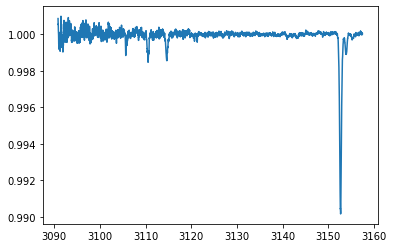

In [36]:
#%matplotlib inline

plt.plot(data2met[:, 0], data2met[:, 1])

{'Centre1': 310.6999999999998,
 'FWHM1': 3.8653502721461575,
 'Centre2': 310.69923083128435,
 'FWHM2': 3.8643869277804113,
 'Centre3': 311.0558838945476,
 'FWHM3': 0.03897297848960431,
 'Centre4': 311.46397060430087,
 'FWHM4': 0.04351015176242151,
 'Centre5': 315.268312195864,
 'FWHM5': 0.04142404840608156,
 'ChiSq': 0.0025553604682853823,
 'RedChiSq': 5.790529046647139e-07}

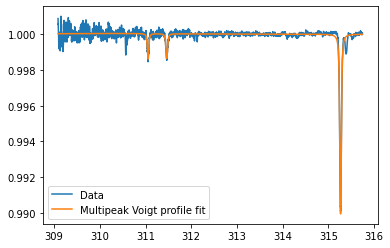

In [7]:
voigtMultiPeakRanges(data2met, 5, np.array([[310.4, 310.7],
                                            [310.8, 311.1],
                                            [311.3, 311.6],
                                            [315.1, 315.34],
                                            [315.34, 315.43]]), 0.25)

In [37]:
print(np.std(data2met[np.logical_and(data2met[:, 0] >= 3116, data2met[:, 0] <= 3151), 1]))

8.481437933819905e-05


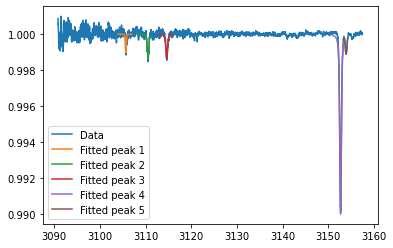

In [38]:
%matplotlib inline

plt.plot(data2met[:, 0], data2met[:, 1], label = 'Data')
raw2met = voigtNUniPeak(data2met, np.array([[3104, 3107],
                                            [3108, 3111],
                                            [3113, 3116],
                                            [3151, 3153.4],
                                            [3153.4, 3154.3]]), 8.481437933819905e-05)
plt.legend()

In [39]:
print(raw2met)

{'Centre1': 3105.7123588005998, 'FWHM1': 0.1978091406882806, 'ChiSq1': 693.8390043802863, 'RedChiSq1': 3.5220254029456157, 'Centre2': 3110.560659197683, 'FWHM2': 0.38210502134130364, 'ChiSq2': 849.4295520972677, 'RedChiSq2': 4.311825137549582, 'Centre3': 3114.6391244797765, 'FWHM3': 0.42129991916888065, 'ChiSq3': 441.22032119285035, 'RedChiSq3': 2.2396970618926413, 'Centre4': 3152.682899739539, 'FWHM4': 0.4116785395701133, 'ChiSq4': 1238.198256821086, 'RedChiSq4': 7.886613100771249, 'Centre5': 3153.893770288672, 'FWHM5': 0.4500845593093833, 'ChiSq5': 22.13836131818562, 'RedChiSq5': 0.38839230382781786}


In [40]:
tPar = np.zeros((5,2))

tPar[0, 0] = raw2met['Centre1']
tPar[1, 0] = raw2met['Centre2']
tPar[2, 0] = raw2met['Centre3']
tPar[3, 0] = raw2met['Centre4']
tPar[4, 0] = raw2met['Centre5']

tPar[0, 1] = raw2met['FWHM1']
tPar[1, 1] = raw2met['FWHM2']
tPar[2, 1] = raw2met['FWHM3']
tPar[3, 1] = raw2met['FWHM4']
tPar[4, 1] = raw2met['FWHM5']

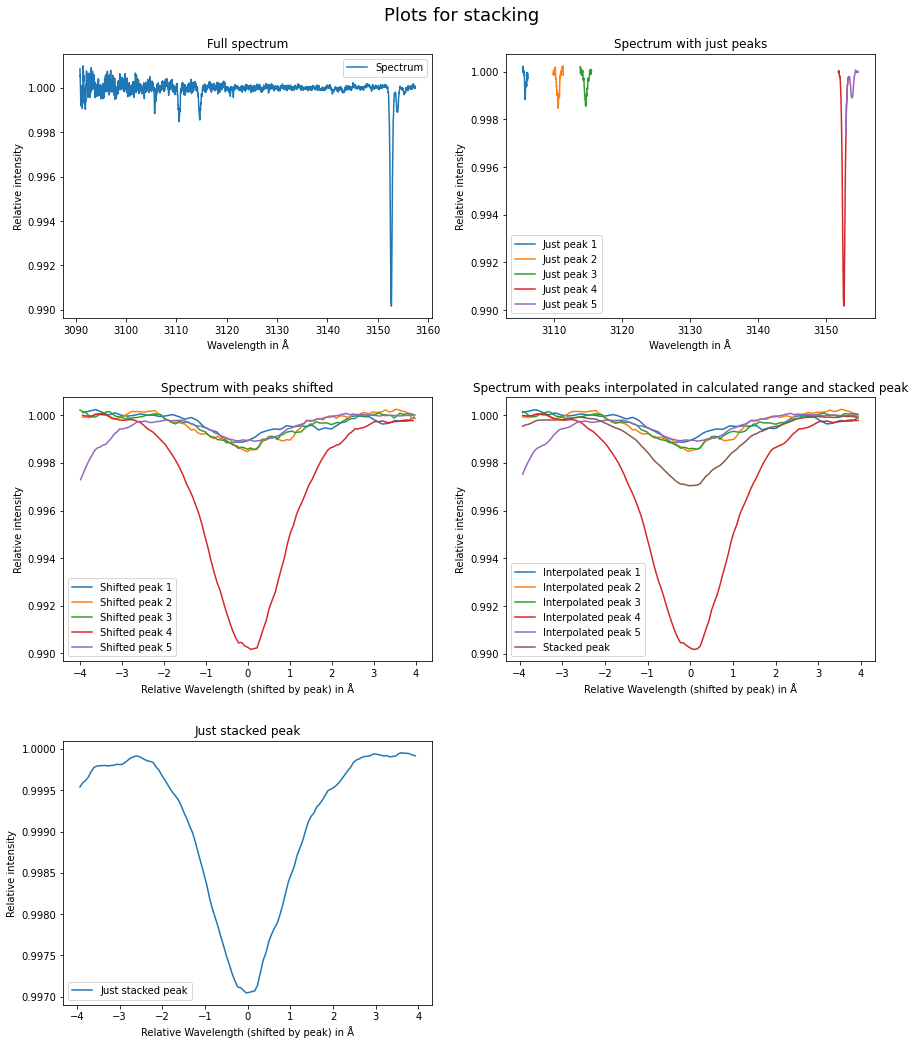

In [41]:
spData = widthNormLinStacker(data2met, tPar)